In [ ]:
%matplotlib widget

In [ ]:
from Onda import Onda
from Animazione import Animazione
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as an
import time

In [ ]:
#parametri del run e condizioni iniziali
L = 50.
T = 4
N = 4096
M = 1000
sigma = 1.5
k0 = 15e0
x0 = 7

In [ ]:
#creazione potenziale V
s_i_1 = N//3 - 50     #step di inizio barriera 1 (incluso)
s_f_1 = s_i_1 + 100    #step di fine barriera 1 (escluso)
s_i_2 = N//2 - 50     #step di inizio barriera 2 (incluso)
s_f_2 = s_i_2 + 100    #step di fine barriera 2 (escluso)
int_1 = 0          #intensità barriera 1
int_2 = 0       #intensità barriera 2

V = np.zeros(N)
V[s_i_1:s_f_1] += int_1
V[s_i_2:s_f_2] += int_2

In [ ]:
#creazione oggetto
wave = Onda(L,T,N,M,V)
wave.traj[:,0] = (1./((2.*np.pi*(sigma**2))**(1/4)))*\
                    np.exp(-((wave.x[:]-x0)**2)/(4.*(sigma**2)))*\
                    np.exp(1j*k0*wave.x[:])

wave.norma[0] = np.sum(np.abs(wave.traj[:,0])**2)

In [ ]:
#evoluzione dell'onda
tic = time.process_time()
for i in range (1,M+1):
    wave.evoluzione(num_step = i)
print("time = ",time.process_time()-tic )

time =  0.42977529999999975


(0.0, 0.75)

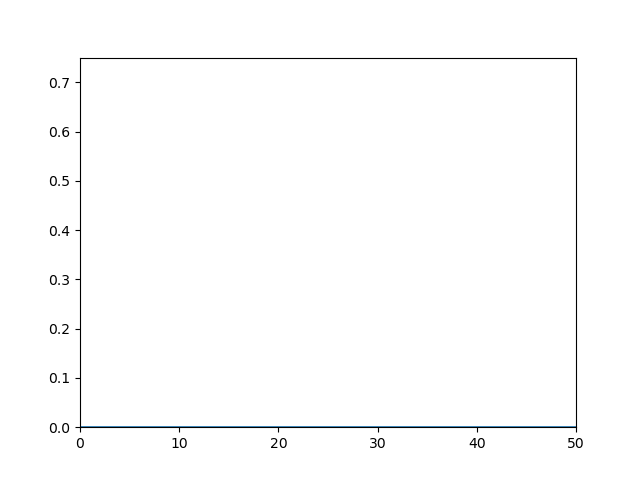

In [ ]:
#animazione
fig, ax = plt.subplots()
plt.step(wave.x,wave.V)
obj = Animazione(ax,wave)
anim = an.FuncAnimation(fig, obj.new_frame, frames=M, interval=10, blit=True)
plt.plot()
ax.set_ylim(0,0.75)

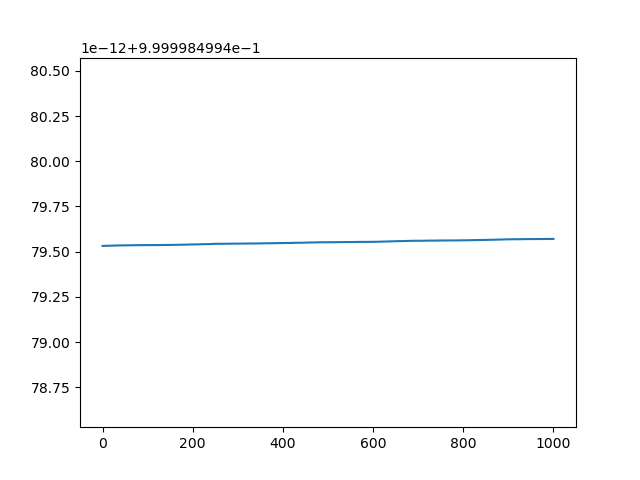

In [10]:
#grafico modulo
fig2, ax2 = plt.subplots()
ax2.plot(wave.norma*wave.dx)
plt.show()

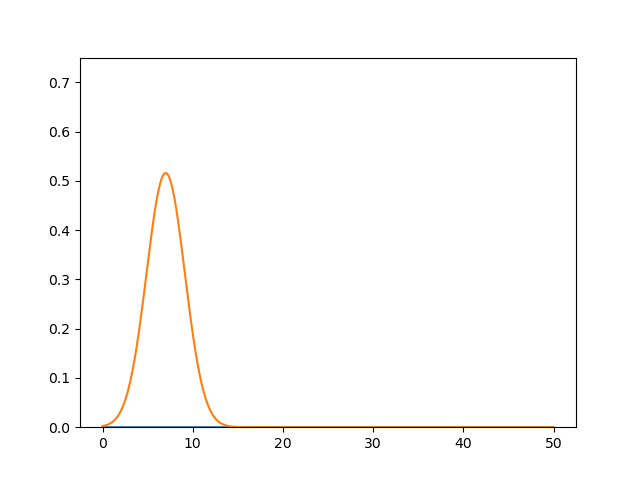

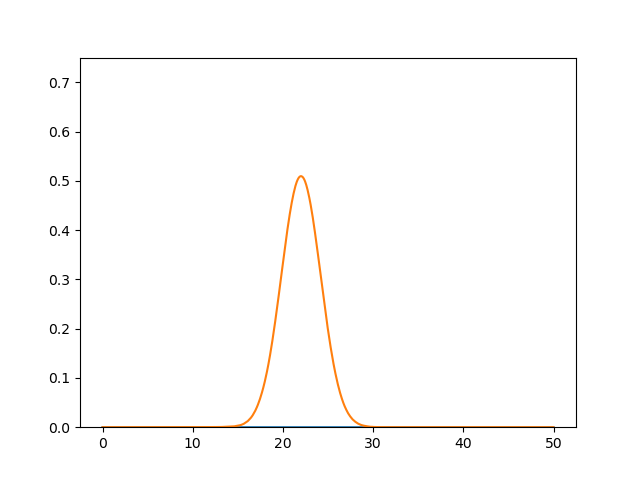

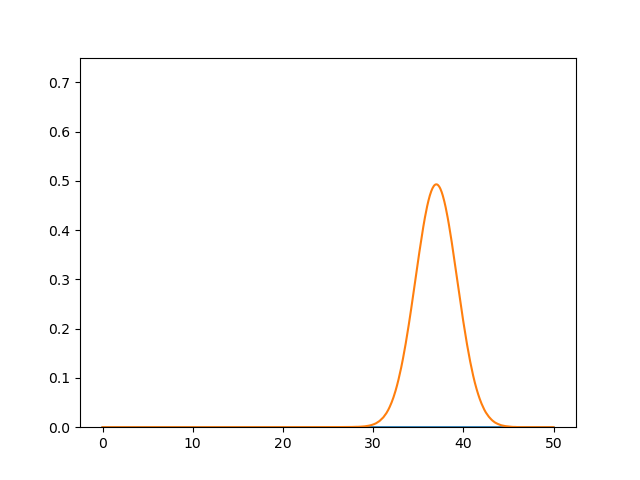

In [ ]:
#save figures
save_times=[0,M//4,M//2]
for i in range(len(plot_times)):
    fig,ax = plt.subplots()
    ax.set_ylim(0,0.75)
    plt.step(wave.x,wave.V)
    plt.plot(wave.x,np.abs(wave.traj[:,plot_times[i]]))
    plt.savefig('nomegrafico_%d.png' %(i+1))